In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()
dir(wine)

['DESCR', 'data', 'feature_names', 'frame', 'target', 'target_names']

In [3]:
df = pd.DataFrame(wine.data, columns = wine.feature_names)
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [4]:
df['target'] = wine.target
df.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [5]:
df[150:160]

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
150,13.50,3.12,2.62,24.0,123.0,1.40,1.57,0.22,1.25,8.60,0.59,1.30,500.0,2
151,12.79,2.67,2.48,22.0,112.0,1.48,1.36,0.24,1.26,10.80,0.48,1.47,480.0,2
152,13.11,1.90,2.75,25.5,116.0,2.20,1.28,0.26,1.56,7.10,0.61,1.33,425.0,2
153,13.23,3.30,2.28,18.5,98.0,1.80,0.83,0.61,1.87,10.52,0.56,1.51,675.0,2
154,12.58,1.29,2.10,20.0,103.0,1.48,0.58,0.53,1.40,7.60,0.58,1.55,640.0,2
155,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
156,13.84,4.12,2.38,19.5,89.0,1.80,0.83,0.48,1.56,9.01,0.57,1.64,480.0,2
157,12.45,3.03,2.64,27.0,97.0,1.90,0.58,0.63,1.14,7.50,0.67,1.73,880.0,2
158,14.34,1.68,2.70,25.0,98.0,2.80,1.31,0.53,2.70,13.00,0.57,1.96,660.0,2
159,13.48,1.67,2.64,22.5,89.0,2.60,1.10,0.52,2.29,11.75,0.57,1.78,620.0,2


In [6]:
df.target.unique()

array([0, 1, 2])

In [7]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [8]:
df = df.drop(['ash', 'hue', 'nonflavanoid_phenols'], axis='columns')
df.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,15.6,127.0,2.80,3.06,2.29,5.64,3.92,1065.0,0
1,13.20,1.78,11.2,100.0,2.65,2.76,1.28,4.38,3.40,1050.0,0
2,13.16,2.36,18.6,101.0,2.80,3.24,2.81,5.68,3.17,1185.0,0
3,14.37,1.95,16.8,113.0,3.85,3.49,2.18,7.80,3.45,1480.0,0
4,13.24,2.59,21.0,118.0,2.80,2.69,1.82,4.32,2.93,735.0,0


In [9]:
df = df.drop('od280/od315_of_diluted_wines', axis='columns')
df.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,proline,target
0,14.23,1.71,15.6,127.0,2.80,3.06,2.29,5.64,1065.0,0
1,13.20,1.78,11.2,100.0,2.65,2.76,1.28,4.38,1050.0,0
2,13.16,2.36,18.6,101.0,2.80,3.24,2.81,5.68,1185.0,0
3,14.37,1.95,16.8,113.0,3.85,3.49,2.18,7.80,1480.0,0
4,13.24,2.59,21.0,118.0,2.80,2.69,1.82,4.32,735.0,0


In [10]:
X = df.drop('target', axis='columns')
y = df.target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [28]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [13]:
model_svc = SVC(kernel='rbf', C=5)
model_svc.fit(X_train, y_train)
model_svc.score(X_test, y_test)

0.7592592592592593

In [14]:
from sklearn.model_selection import cross_val_score

In [21]:
cross_val_score(SVC(kernel='rbf', C=5, gamma='auto'), X, y, cv = 3)

array([0.4       , 0.40677966, 0.44067797])

In [22]:
cross_val_score(SVC(kernel='rbf', C=10, gamma='auto'), X, y, cv = 3)

array([0.4       , 0.40677966, 0.44067797])

In [23]:
cross_val_score(SVC(kernel='linear', C=10, gamma='auto'), X, y, cv = 3)

array([0.85      , 0.98305085, 0.98305085])

In [24]:
from sklearn.model_selection import GridSearchCV

clf = GridSearchCV(SVC(gamma='auto'), {
    'C': [1, 3, 5, 10],
    'kernel': ['rbf', 'linear']
}, cv = 3, return_train_score=False)

clf.fit(X_train, y_train)
result = pd.DataFrame(clf.cv_results_)
result

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_kernel,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007255,0.000493,0.005504,0.000122,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.380952,0.365854,0.390244,0.379017,0.010051,8
1,0.057536,0.006733,0.005162,0.002120,1,linear,"{'C': 1, 'kernel': 'linear'}",0.809524,0.926829,0.902439,0.879597,0.050540,1
2,0.005635,0.000005,0.004134,0.000017,3,rbf,"{'C': 3, 'kernel': 'rbf'}",0.428571,0.390244,0.414634,0.411150,0.015840,5
3,0.049553,0.018659,0.003355,0.000060,3,linear,"{'C': 3, 'kernel': 'linear'}",0.809524,0.926829,0.902439,0.879597,0.050540,1
4,0.005588,0.000042,0.004202,0.000073,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.428571,0.390244,0.414634,0.411150,0.015840,5
5,0.050312,0.019747,0.003563,0.000343,5,linear,"{'C': 5, 'kernel': 'linear'}",0.809524,0.926829,0.902439,0.879597,0.050540,1
6,0.005617,0.000054,0.004138,0.000055,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.428571,0.390244,0.414634,0.411150,0.015840,5
7,0.049756,0.018892,0.003211,0.000057,10,linear,"{'C': 10, 'kernel': 'linear'}",0.809524,0.926829,0.902439,0.879597,0.050540,1


In [25]:
result = result[['param_C', 'param_kernel', 'params', 'mean_test_score']]
result

,param_C,param_kernel,params,mean_test_score
0,1,rbf,"{'C': 1, 'kernel': 'rbf'}",0.379017
1,1,linear,"{'C': 1, 'kernel': 'linear'}",0.879597
2,3,rbf,"{'C': 3, 'kernel': 'rbf'}",0.411150
3,3,linear,"{'C': 3, 'kernel': 'linear'}",0.879597
4,5,rbf,"{'C': 5, 'kernel': 'rbf'}",0.411150
5,5,linear,"{'C': 5, 'kernel': 'linear'}",0.879597
6,10,rbf,"{'C': 10, 'kernel': 'rbf'}",0.411150
7,10,linear,"{'C': 10, 'kernel': 'linear'}",0.879597


In [26]:
clf.best_score_

np.float64(0.8795973674022455)

In [27]:
clf.best_params_

{'C': 1, 'kernel': 'linear'}

In [31]:
model_params = {
    'svc': {
        'model': SVC(gamma = 'auto'),
        'params': {
            'C': [1, 10, 20],
            'kernel': ['rbf', 'linear']
        }
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params': {
            'n_estimators': [1, 5, 10]
        }
    },
    'logistic_regression': {
        'model': LogisticRegression(solver = 'liblinear', multi_class = 'auto'),
        'params': {
            'C': [1, 5, 10]
        }
    }
}

In [32]:
scores = []

for model_name, mp in model_params.items():
    clf = GridSearchCV(mp['model'], mp['params'], cv = 5, return_train_score=False)
    clf.fit(X, y)
    scores.append({
        'model': model_name,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })

C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(
C:\Users\HP\AppData\Local\Programs\Python\Python313\Lib

In [33]:
results = pd.DataFrame(scores)
results

,model,best_score,best_params
0,svc,0.944444,"{'C': 1, 'kernel': 'linear'}"
1,random_forest,0.961111,{'n_estimators': 5}
2,logistic_regression,0.966667,{'C': 1}


In [36]:
results.loc[results['best_score'].idxmax()]

model          logistic_regression
best_score                0.966667
best_params               {'C': 1}
Name: 2, dtype: object

In [37]:
from sklearn.cluster import KMeans

In [41]:
k_rng = range(1, 10)
sse = []
for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

Text(0.5, 1.0, 'K vs SSE')

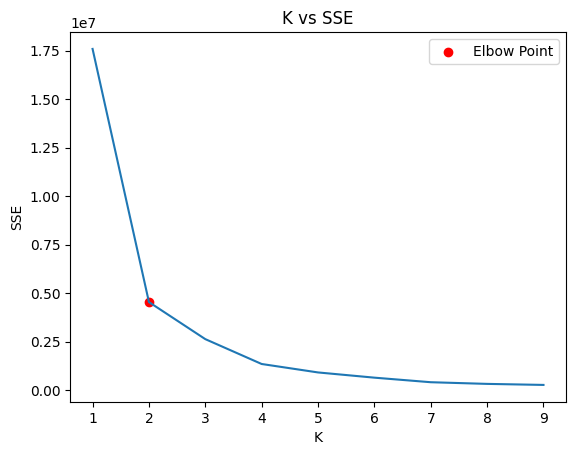

In [43]:
import matplotlib.pyplot as plt

plt.plot(k_rng, sse)
plt.scatter(k_rng[1], sse[1], color='red', label='Elbow Point')
plt.legend()
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('K vs SSE')

In [44]:
km = KMeans(n_clusters=2)
yp = km.fit_predict(X)
df['cluster'] = yp
df.head()

,alcohol,malic_acid,alcalinity_of_ash,magnesium,total_phenols,flavanoids,proanthocyanins,color_intensity,proline,target,cluster
0,14.23,1.71,15.6,127.0,2.80,3.06,2.29,5.64,1065.0,0,1
1,13.20,1.78,11.2,100.0,2.65,2.76,1.28,4.38,1050.0,0,1
2,13.16,2.36,18.6,101.0,2.80,3.24,2.81,5.68,1185.0,0,1
3,14.37,1.95,16.8,113.0,3.85,3.49,2.18,7.80,1480.0,0,1
4,13.24,2.59,21.0,118.0,2.80,2.69,1.82,4.32,735.0,0,0


In [45]:
df.cluster.unique()

array([1, 0], dtype=int32)

In [46]:
df1 = df[df['cluster'] == 0]
df2 = df[df['cluster'] == 1]

In [47]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

Text(0.5, 1.0, 'Malic Acid vs Flavanoids')

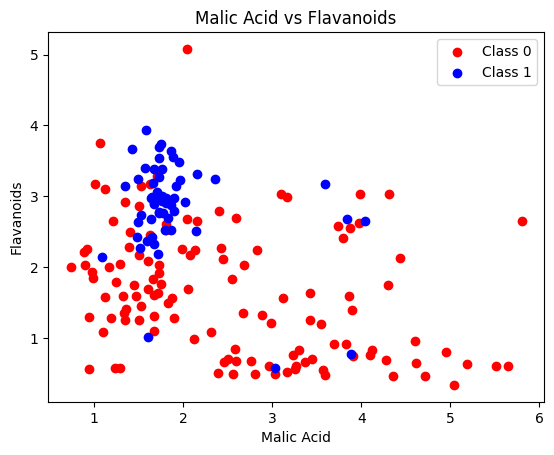

In [48]:
plt.scatter(df1['malic_acid'], df1['flavanoids'], color='red', label='Class 0')
plt.scatter(df2['malic_acid'], df2['flavanoids'], color='blue', label='Class 1')
plt.legend()
plt.xlabel('Malic Acid')
plt.ylabel('Flavanoids')
plt.title('Malic Acid vs Flavanoids')